In [110]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gzip
import json
import faker
fake = faker.Faker()

In [102]:
a = [random.gauss(mu = 0  , sigma = 1) for _ in range(1000)]
b = [random.gauss(mu = -10, sigma = 1) for _ in range(1000)]
c = [random.gauss(mu = 10 , sigma = 1) for _ in range(1000)]

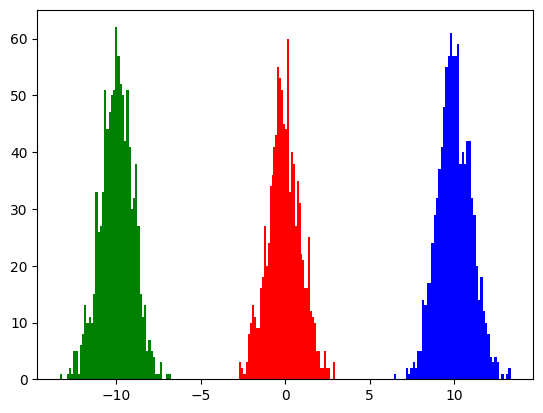

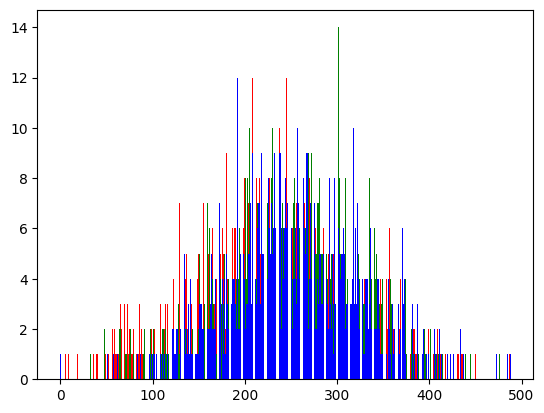

In [103]:
plt.hist(x = a, bins = 50, color = 'red')
plt.hist(x = b, bins = 50, color = 'green')
plt.hist(x = c, bins = 50, color = 'blue')
plt.show()
hist, bins = np.histogram(a, bins=489)
plt.bar(x = [_ for _ in range(489)], height=hist, color = 'red')
hist, bins = np.histogram(b, bins=489)
plt.bar(x = [_ for _ in range(489)], height=hist, color = 'green')
hist, bins = np.histogram(c, bins=489)
plt.bar(x = [_ for _ in range(489)], height=hist, color = 'blue')
plt.show()

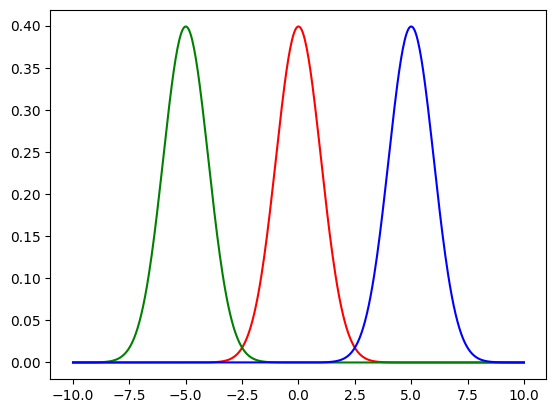

In [104]:
from scipy.stats import norm
x = np.linspace(-10, 10, 489)
a = norm.pdf(x, loc=0, scale=1)   # Group 1
plt.plot(x, a, c = 'red')
b = norm.pdf(x, loc =-5, scale=1) # Group 2
plt.plot(x, b, c = 'green')
c = norm.pdf(x, loc = 5, scale=1) # Group 3
plt.plot(x, c, c = 'blue')
plt.show()

In [ ]:
df = pd.read_csv('../Data/Final_Events.csv')
df.shape[0]

In [ ]:
s = df.sample(n = 300, replace = False, weights = a, random_state=42)['Title'].value_counts().to_dict()

In [109]:
s

{'The Game': 12,
 'Zumba at The Gateway': 5,
 'Kevin Hart: Acting My Age': 5,
 'Nintendo Switch Gaming (Ages 7-9)': 4,
 'Mini Group: Yard Sale Prep at Kathy Torg’s House': 4,
 'The Raven Age': 3,
 'Fandom Swap': 3,
 'ThunderCon 2025': 3,
 'DreamHack Dallas': 3,
 'Spring Matsuri V': 2,
 'PAX West': 2,
 'The Game - 20 Years of The Documentary': 2,
 'Tween/Teen Gaming!': 2,
 'QuakeCon 2025': 2,
 'METROCON - Friday': 2,
 'Veeder Root ATG Factory Certification – Dayton': 2,
 'iMagicon 2025': 2,
 "90's Con [CONVENTION]": 2,
 'Retro Games @ Sedgwick': 2,
 'The Game, The Documentary 20th Anniversary Tour': 2,
 'Emerald City Comic Con': 2,
 'Metrotham Con 2025': 2,
 'WACO BRICK CONVENTION - LEGO Fan Expo': 2,
 'DreamHack': 2,
 'USF Gaming Club General Meetings': 2,
 'LTU Expo 2025': 1,
 "A WOMAN'S DAY - Omaggio alle voci femminili della musica - SPAZIO GLORIA (COMO)": 1,
 'LTU Expo 2025 — Psychic Drive': 1,
 'Matsuricon 2025': 1,
 'ATG Expo 2025': 1,
 'Candlelight: I grandi successi di Bridgert

In [111]:
def write_comp_json(data: dict, FileName: str) -> None:
    with gzip.open(FileName, 'w') as fout:
        fout.write(json.dumps(data).encode('utf-8'))  
        
def read_comp_json(FileName: str) -> None:
    with gzip.open(FileName, 'r') as fin:
        data = json.loads(fin.read().decode('utf-8'))
    return data

In [74]:
fake.email()

'cathyserrano@example.com'